# The Restricted 3-body Problem
## Christina Lee
## Prerequisites: Classical Mechanics

The full 3-body problem has challenged, intrigued, confounded, and thrilled physicists for hundreds of years. Even today, researchers still actively work at untangling the intricacies of planetary dynamics. In the 17-1800's, many physicists/ mathematicians would spend most of their careers devoted to tackling the problem. For some, this resulted in calculating another term or two in a perturbation expansion.  In modern days with the advent of exo-planet detection methods, we have hundreds of real planetary systems to examine. As a result of this, the questions about planetary evolution and stability become much more relevant and observationally testable.

A variety of different methods exist for examining the characteristics of these systems; from full-scale simulations of billions of particles, down to simple toy models we can solve on paper (if you really like algebra).  In this post, we will make a series of approximations to discover properties of planetary dynamics visible within our solar system.

### Center of Mass

To specify a two-body Keplerian system, we pass in two masses $M_1$ and $M_2$ and the relative distance between them $r$.

![](2body.svg)

While we might think that the origin of the solar system should be the center of the Sun (the more massive body), we find computations much easier if we take our stationary origin point to be the <b>Center of Mass</b>(COM). The sun will then actually orbit around the COM. For systems for large mass differences $M_2/M_1 << 1$ the Sun's orbit will be extremely small.  

Let's first calculate the distances between the two masses and the COM.
$$
M_1 r_1 = M_2 r_2= M_1 (r-r_2) 
$$
$$
(M_2+M_1) r_2 = M_1 r
$$
$$
r_2 = \frac{M_1}{M_2+M_1} r \qquad \qquad r_1 = \frac{M_2}{M_2+M_1} r
$$

### Co-rotating Frame
To illustrate ideas more succinctly and simplify computation, we are going to perform our calculations in the <b>co-rotating</b> frame. Even though both our masses will physically be rotating around each other, they will be stationary in our coordinate system.  This may seem initially strange, but realize that we are in a corotating system on the surface on the Earth.  On the equator, you are not aware that you are rotating through space at 1,000 mph.  Everything else is moving at that speed too, and the effects of rotation are usually overcome by gravity.  (See weather patterns for an exception)

When moving into a <b>non-inertial</b> reference frame like a co-rotating frame, we pick up fictitious forces that are a byproduct of the frame's acceleration.  Think of when you're looking out a train window at a train next to you starting to move.  Sometimes, I momentarily begin to think that I'm actually accelerating instead.

When dealing with a rotating frame, we need the Centrifugal and Coriolis forces.  
$$
F_{Centrifugal} = - m \vec{\Omega} \times ( \vec{\Omega} \times \vec{r} )
$$
$$
F_{Coriolis} = - 2m \vec{\Omega} \times \vec{v}
$$

If we assume a planar orbit, we can set $\vec{\Omega} = \omega \hat{z}$.  We can then proceed with simplyfying the above equations to
$$
F_{Centrifugal} = m \omega^2 ( x, y , 0)
$$
$$
F_{Coriolis} = - 2 m \omega ( - v_y, v_x, 0 )
$$

### The first approximation

Not all masses are created equal.  

For example, in our solar system, the Sun primarily controls the motion of the planets in our system. After that, Jupiter causes deviations from a pure-Sun orbit.

Then Saturn... and so forth down the ladder. Until we finally arrive at objects like a 10 kg unmanned robotic explorer.  

We can safely assume that although the Sun and "Jupiter" have an effect on our little 10kg explorer, the 10kg orbiter does not have an appreciable impact on the motion of either the Sun or "Jupiter".

For our approximation, we consider two massive bodies in two standard  Keplerian orbits, while a third "test mass" acts under the gravitational field created by those bodies without influencing their orbits.



### Circular Orbit Frequency
We approximate that the two massive bodies $M_1$ and $M_2$ rotate around each other in a perfectly <b>circular</b> orbit. Then in a corotating frame neither the rotation rate nor the positions of the planets will change in time.

In this orbit, the gravitational force perfectly balances the centripetal force.

$$
\frac{G M_1 M_2}{r^2} = M_1 r_1 \omega^2 = M_2 r_2 \omega^2
$$

Putting this back into our force equation gives us the rotation rate.

$$
\omega = \frac{G (M_1+M_2 )}{r^3} 
$$

In [ ]:
using Plots
using LinearAlgebra
using DifferentialEquations
gr() #plotlyjs doesn't seem to be working write now :(

┌ Info: Recompiling stale cache file /home/shaula/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1187


In [ ]:
# Inputted Variables
M1=1.
M2=0.001
r=1.

In [ ]:
# Gravitational Constant 
# Change G to 6.67e-11 if you want a physical system
G=1

In [ ]:
# Variables calculated from of inputted variables

# distance from COM to masses
r1=M2*r/(M1+M2)
r2=M1*r/(M1+M2)

# position of masses relatively to COM
x1=[-r1,0,0]
x2=[r2,0,0]

# reduced mass (don't actually use here)
μ=M1*M2/(M1+M2)

# rotation frequency
ω=sqrt(G*(M1+M2)/r^3)

## Zero Velocity Potential

If we assume a stationary test mass, we can neglect the velocity-dependent Coriolis force and construct a potential. 

The the case of one mass much larger than the other, the potential due to the larger mass will wash out all other details if the potential is examined normally.  Thus, I apply a cutoff and plot asinh of values to pick out smaller details.

The Hill Radius
$$
r_{Hill} = r \sqrt[3]{\frac{M_2}{3 M_1}}
$$
describes the sphere of influence for $M_2$ when $M_2 << M_1$.  Within $M_2$'s sphere of influence, objects would be considered "captured".  For example, Earth's Hill radius is $1.47\times 10^9$ m, or 3.8 times the Earth-Moon mean distance.  Thus, the moon is considered bound to the Earth and not primarily the Sun.

The zero velocity potential has five stationary points.  If objects are not moving exactly at the stationary points, they will remain there forever ... in theory.  

In practice, something will come along to perturb the object.

These five points are called the <b>Lagrangian Points</b>, named after Joseph Louis Lagrange 1736-1813.  In addition to working out these five points stationary points, Lagrange reformulated classical mechanics, helped found variational calculus, and made contributions to our understanding of orbital stability and the types of evolutions orbits can undergo.

### Lagrangian Points

The first three Lagrangian points are unstable.  Objects that either just start close to the point or start on the point with some velocity will eventually fly off somewhere and never return.  These three points lie in a line connecting $M_1$, $M_2$ and the center of mass.

$$
x_{L_1}= r_2-r_{Hill}
$$
$$
x_{L_2}= r_2+r_{Hill}
$$
$$
x_{L_3} = -r\left(1+\frac{5 M_2}{12 M_1}\right)
$$

The fourth and fifth Lagrangian points lie $\pi/3$ (60deg) ahead and behind a planet in its orbit.  More generally, the two masses and the Lagrangian point will form an equilateral triangle.  

Four and five are stable.  

Objects slightly disturbed from the Lagrangian point will just circle around the general vicinity. These orbits were dubbed <i>tadpole<i> orbits by someone with a great deal of creativity, alcohol, or both. Objects with greater perturbations can occupy <i>horseshoe</i>, moving from one stable Lagrangian point to the other, and back again.  We will examine examples of both these types.



In [ ]:
function Potential(x)
    return -G*M1/norm(x-x1)-G*M2/norm(x-x2)-.5*ω*(x[1]^2+x[2]^2)
end

rhill= r*cbrt(M2/(3*M1))

In [ ]:
xgrid=collect(-1.4*r2:0.005:1.4*r2)
ygrid=copy(xgrid)

cutoff=-1.8

Va=zeros(Float64,length(xgrid),length(ygrid))
Va_cut=zeros(Float64,length(xgrid),length(ygrid))
for ii in 1:length(xgrid)
    for jj in 1:length(ygrid)
        Va[ii,jj]=Potential([xgrid[ii],ygrid[jj],0])
        
        if Va[ii,jj]<cutoff
            Va_cut[ii,jj]=NaN
        else 
            Va_cut[ii,jj]=Va[ii,jj]
        end
    end
end

In [ ]:
surface(xgrid,ygrid,transpose(Va),camera=(0,45))
plot!(xlabel="X",ylabel="Y", zlabel="Potential",title="2-body Corotating Potential")

So in this picture, all we can really see is the $1/r$ well from our massive central body.  But other features exist in the potential; we just need to plot it differently in order to elucidate them.

In [ ]:
surface(xgrid,ygrid,transpose(asinh.(Va_cut)),camera=(0,70))
plot!(xlabel="X",ylabel="Y", zlabel="asinh Potential",title="Cropped and asinh Potential")

In [ ]:
surface(xgrid[440:520],ygrid[250:310],transpose(Va[440:520,250:310]),camera=(30,40))
plot!(xlabel="x",ylabel="y", zlabel="Potential",title="Zoom on 2nd Mass")

In [ ]:
rhill= r*cbrt(M2/(3*M1))
rl3=r*(1+5*M2/12*M1)

L1=[r2-rhill,0,0]
L2=[r2+rhill,0,0]
L3=[-rl3,0,0]
L4=[r2*cos(π/3),r2*sin(π/3),0]
L5=[r2*cos(-π/3),r2*sin(-π/3),0]
Lall=hcat(L1,L2,L3,L4,L5)

In [ ]:
heatmap(xgrid,ygrid,transpose(asinh.(Va_cut)))
plot!(r2.+rhill*sin.(-.1:.01:2π),rhill*cos.(-.1:.01:2π),width=2,label="Hill Sphere")
scatter!(Lall[1,:],Lall[2,:], label="Lagrangian Points")
plot!(xlabel="X",ylabel="Y",title="Heatmap of asinh Cut Potential",legend=false)

In [ ]:
heatmap(xgrid[440:520],ygrid[250:310],transpose(Va[440:520,250:310]))
plot!(r2.+rhill*sin.(-.1:.01:2π),rhill*cos.(-.1:.01:2π),width=2,label="Hill Sphere")
plot!(xlabel="X",ylabel="Y",title="Heatmap of Potential",legend=false)

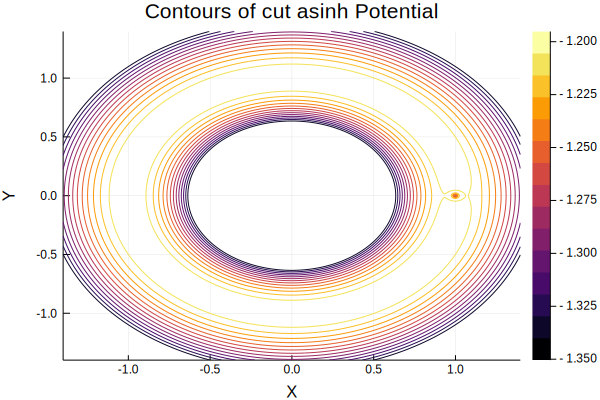

In [13]:
contour(xgrid,ygrid,transpose(asinh.(Va_cut)))
plot!(xlabel="X",ylabel="Y",title="Contours of cut asinh Potential")

## Forces and Evolution

In [ ]:
#Forces in Co-rotating Frame

function F_Coriolis(v::Array{Float64})
    return -2*ω*[-v[2],v[1],0]
end

function F_Centrifugal(x::Array{Float64})
    return ω^2*[x[1],x[2],0]
end

function F_G(x::Array{Float64})
   return -G*M1*(x-x1)/norm(x-x1)^3-G*M2*(x-x2)/norm(x-x2)^3
end

Now that we have forces let's that there is in fact zero (or approximately zero) net force at the Lagrangian points.  I stick in other random non-Langrangian points so we can get an idea of the order of magnitude forces are other places.

Though we do have som error and residual force at our Lagrangian points, the force there is much smaller than that at random points.

In [ ]:
println("L point \t Net Force")
for ii in 1:5
    println(ii,"\t",F_G(Lall[:,ii])+F_Centrifugal(Lall[:,ii]))
end
println("Rand \t",F_G(L1+[.34,-.2,0])+F_Centrifugal(L1+[.34,-.2,0]))
println("Rand \t",F_G(L3+[.2,.43,0])+F_Centrifugal(L3+[.2,.43,0]))

In [ ]:
# Form of the Differential Equation for the test mass for the DifferentialEquations.jl package
# u[1:3] are positions
# u[4:6] are velocities
function DiffEqForm(du,u,p,t)    
    du[1:3]=u[4:6]
    du[4:6]=F_G(u[1:3])+F_Centrifugal(u[1:3])+F_Coriolis(u[4:6])
end

In [ ]:
u0_L1_1=[r2-rhill;0.;0.;0.;0.;0.]
u0_L1_2=[r2-rhill+0.005;0.;0.;0.;0.;0.]

u0_L2_1=[r2+rhill;0.;0.;0.;0.;0.]
u0_L2_2=[r2+rhill+0.005;0.;0.;0.;0.;0.]

u0_L3_1=[-r2;0.;0; 0.;0.;0.]
u0_L3_2=[-r2-0.005;0.;0.; 0.;0.;0.]

tspan_123=(0.,25.)

u0_L4_1=[r2*cos(π/3)+.01;r2*sin(π/3);0.;0.;0.0;0.]
u0_L4_2=[r2*cos(π/3)+.005;r2*sin(π/3);0.;0.;0.0;0.]
u0_L4_3=[r2*cos(π/3+.1)-.02;r2*sin(π/3+.1)+.02;0.;0.;0.0;0.]
u0_L4_4=[r2*cos(π/3+1.4);r2*sin(π/3+1.4)+.01;0.;0.02;0.02;0.]

u0_L5_1=[r2*cos(π/3)+.01;-r2*sin(π/3);0.;0.;0.0;0.]
u0_L5_2=[r2*cos(π/3)+.005;-r2*sin(π/3);0.;0.;0.0;0.]
tspan_45=(0.,100.)
tspan_horse=(0.,1500.)

(0.5095004995004997, 0.8651602435408978)

In [19]:
prob_L1_1 = ODEProblem(DiffEqForm,u0_L1_1,tspan_123)
sol_L1_1 = solve(prob_L1_1);

prob_L1_2 = ODEProblem(DiffEqForm,u0_L1_2,tspan_123)
sol_L1_2 = solve(prob_L1_2);

prob_L2_1 = ODEProblem(DiffEqForm,u0_L2_1,tspan_123)
sol_L2_1 = solve(prob_L2_1);

prob_L2_2 = ODEProblem(DiffEqForm,u0_L2_2,tspan_123)
sol_L2_2 = solve(prob_L2_2);

prob_L3_1 = ODEProblem(DiffEqForm,u0_L3_1,tspan_123)
sol_L3_1 = solve(prob_L3_1);

prob_L3_2 = ODEProblem(DiffEqForm,u0_L3_2,tspan_123)
sol_L3_2 = solve(prob_L3_2);

UndefVarError: UndefVarError: ODEProblem not defined

In [20]:
prob_L4_1 = ODEProblem(DiffEqForm,u0_L4_1,tspan_45)
sol_L4_1 = solve(prob_L4_1);

prob_L4_2 = ODEProblem(DiffEqForm,u0_L4_2,tspan_45)
sol_L4_2 = solve(prob_L4_2);

prob_L4_3 = ODEProblem(DiffEqForm,u0_L4_3,tspan_45)
sol_L4_3 = solve(prob_L4_3);

prob_L4_4 = ODEProblem(DiffEqForm,u0_L4_4,tspan_horse)
sol_L4_4 = solve(prob_L4_4);

prob_L5_1 = ODEProblem(DiffEqForm,u0_L5_1,tspan_45)
sol_L5_1 = solve(prob_L5_1);

prob_L5_2 = ODEProblem(DiffEqForm,u0_L5_2,tspan_45)
sol_L5_2 = solve(prob_L5_2);

UndefVarError: UndefVarError: ODEProblem not defined

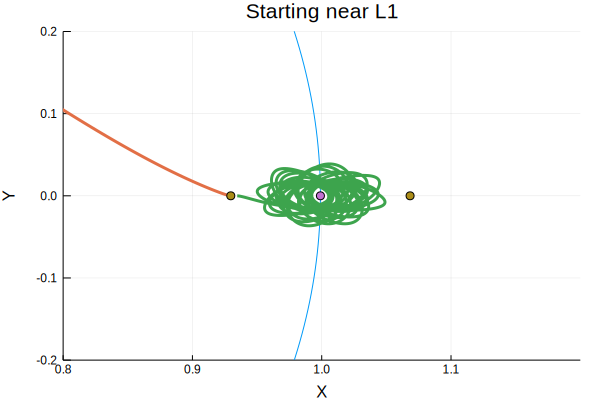

In [17]:
plot(r2*sin.(collect(-.1:.01:2π)),r2*cos.(collect(-.1:.01:2π))
    ,legend=false,xlims=(.8,1.2),ylims=(-.2,.2))

plot!(sol_L1_1,vars=(1,2))
plot!(sol_L1_2,vars=(1,2))

scatter!([-r1,r2],[0,0],xlims=(.8,1.2),ylims=(-.2,.2))
scatter!(Lall[1,:],Lall[2,:], label="Lagrangian Points")

plot!(xlabel="X",ylabel="Y",title="Starting near L1")

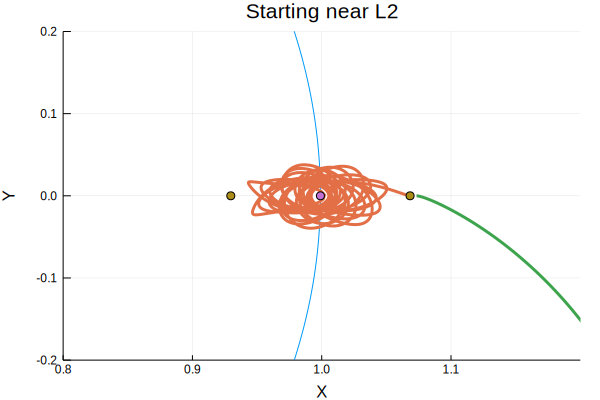

In [18]:
plot(r2*sin.(collect(-.1:.01:2π)),r2*cos.(collect(-.1:.01:2π))
    ,legend=false,xlims=(.8,1.2),ylims=(-.2,.2))

plot!(sol_L2_1,vars=(1,2))
plot!(sol_L2_2,vars=(1,2))

scatter!([-r1,r2],[0,0],xlims=(.8,1.2),ylims=(-.2,.2))
scatter!(Lall[1,:],Lall[2,:], label="Lagrangian Points")

plot!(xlabel="X",ylabel="Y",title="Starting near L2")

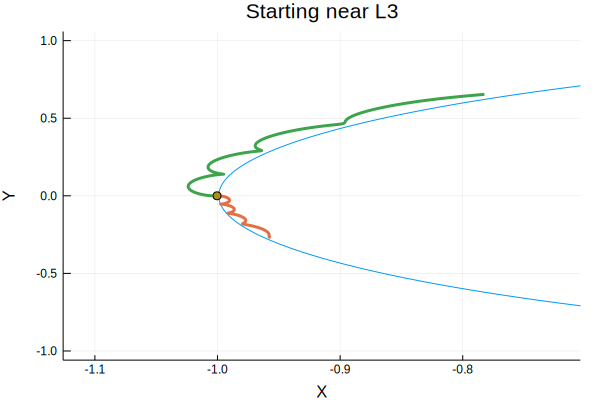

In [19]:
plot(r2*sin.(collect(-.1:.01:2π)),r2*cos.(collect(-.1:.01:2π))
    ,legend=false)

plot!(sol_L3_1,vars=(1,2))
plot!(sol_L3_2,vars=(1,2))


scatter!([-r1,r2],[0,0])
scatter!(Lall[1,:],Lall[2,:], label="Lagrangian Points")

plot!(xlabel="X",ylabel="Y",title="Starting near L3")

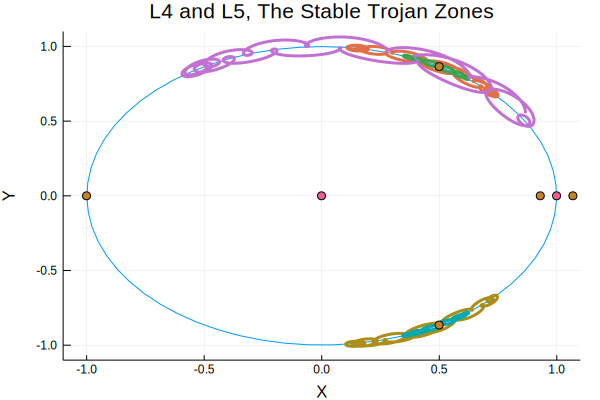

In [55]:
plot(r2*sin.(collect(-.1:.1:2π)),r2*cos.(collect(-.1:.1:2π))
    ,legend=false,xlims=(-1.1,1.1),ylims=(-1.1,1.1))

plot!(sol_L4_1,vars=(1,2))
plot!(sol_L4_2,vars=(1,2))
plot!(sol_L4_3,vars=(1,2))

plot!(sol_L5_1,vars=(1,2))
plot!(sol_L5_2,vars=(1,2))

scatter!([-r1,r2],[0,0],xlims=(-1.1,1.1),ylims=(-1.1,1.1))
scatter!(Lall[1,:],Lall[2,:], label="Lagrangian Points")

plot!(xlabel="X",ylabel="Y",title="L4 and L5, The Stable Trojan Zones")

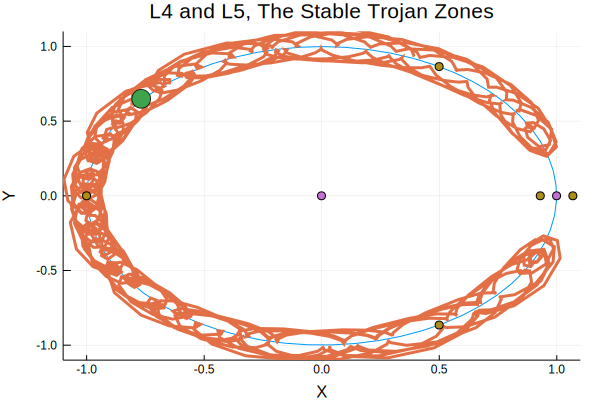

In [167]:
plot(r2*sin.(collect(-.1:.1:2π)),r2*cos.(collect(-.1:.1:2π))
    ,legend=false,xlims=(-1.1,1.1),ylims=(-1.1,1.1))

plot!(sol_L4_4[1:1000],vars=(1,2))
scatter!([u0_L4_4[1]],[u0_L4_4[2]],markersize=10)


scatter!([-r1,r2],[0,0],xlims=(-1.1,1.1),ylims=(-1.1,1.1))
scatter!(Lall[1,:],Lall[2,:], label="Lagrangian Points")

plot!(xlabel="X",ylabel="Y",title="L4 and L5, The Stable Trojan Zones")

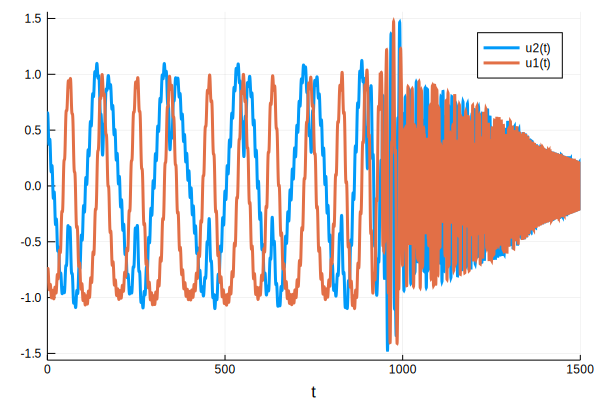

In [168]:
plot(sol_L4_4,vars=(0,2))
plot!(sol_L4_4,vars=(0,1))

In our system, Jupiter's Lagrangian points are occupied by two groups of asteriods known as <i>trojans</i>.  The $L_4$ group is the <i>Greek camp</i>, and the $L_5$ group is the <i>Trojan camp</i>